# VII) Modélisation (Classification Binaire) et Evaluation 

#  VII.1 )SVM (Support vector Machine)

In [4]:
from sklearn.model_selection import train_test_split

with open('D:/Users/DELL/Desktop/TravailNLP/cleaned_train.txt', 'r', encoding='utf-8') as file:
    train_data = file.readlines()

with open('D:/Users/DELL/Desktop/TravailNLP/cleaned_val.txt', 'r', encoding='utf-8') as file:
    val_data = file.readlines()

with open('D:/Users/DELL/Desktop/TravailNLP/cleaned_test.txt', 'r', encoding='utf-8') as file:
    test_data = file.readlines()
    
    
# Définir les étiquettes (classe 0 pour émotions positives et classe 1 pour émotions négatives)
train_labels = [0 if any(emotion in line for emotion in ["joy", "love", "surprise"]) else 1 for line in train_data]
val_labels = [0 if any(emotion in line for emotion in ["joy", "love", "surprise"]) else 1 for line in val_data]
test_labels = [0 if any(emotion in line for emotion in ["joy", "love", "surprise"]) else 1 for line in test_data]

# Diviser les données en ensembles d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Vérifier les dimensions des ensembles de données
print(f"X_train shape: {len(X_train)}")
print(f"X_val shape: {len(X_val)}")
print(f"X_test shape: {len(X_test)}")


X_train shape: 1620
X_val shape: 180
X_test shape: 200


In [15]:
# Initialiser et entraîner le modèle SVM avec un paramètre C spécifique
C_value = 10.0  # Vous pouvez ajuster cette valeur en fonction de votre besoin
svm_model = SVC(kernel='linear', C=C_value, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,accuracy_score

# Prédire les étiquettes sur l'ensemble de validation
y_val_pred = svm_model.predict(X_val_tfidf)

# Calculer la précision, le rappel et le score F1
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Calculer l'AUC-ROC
y_val_prob = svm_model.decision_function(X_val_tfidf)  # Probabilités des classes
roc_auc = roc_auc_score(y_val, y_val_prob)

# Afficher les métriques
print("accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)
print("AUC-ROC Score:", roc_auc)




accuracy: 0.9944444444444445
Précision: 0.98989898989899
Rappel: 1.0
Score F1: 0.9949238578680203
AUC-ROC Score: 0.9992533598805375


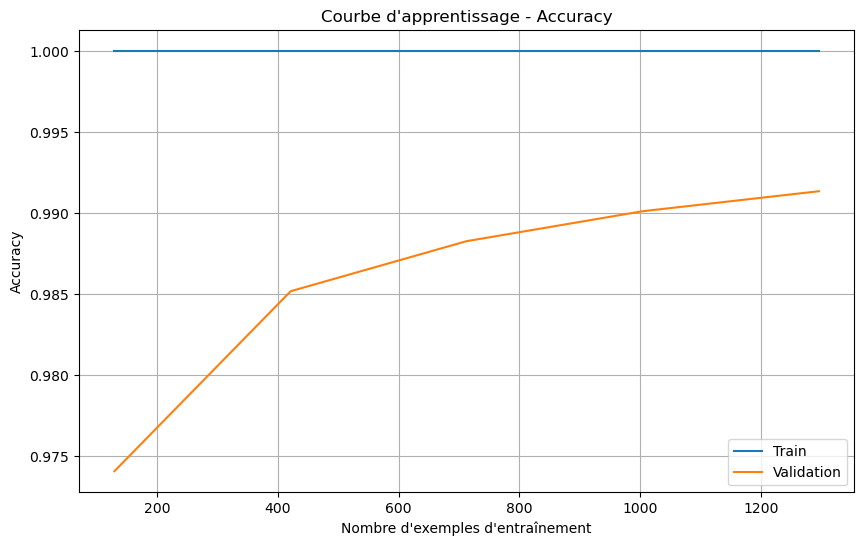

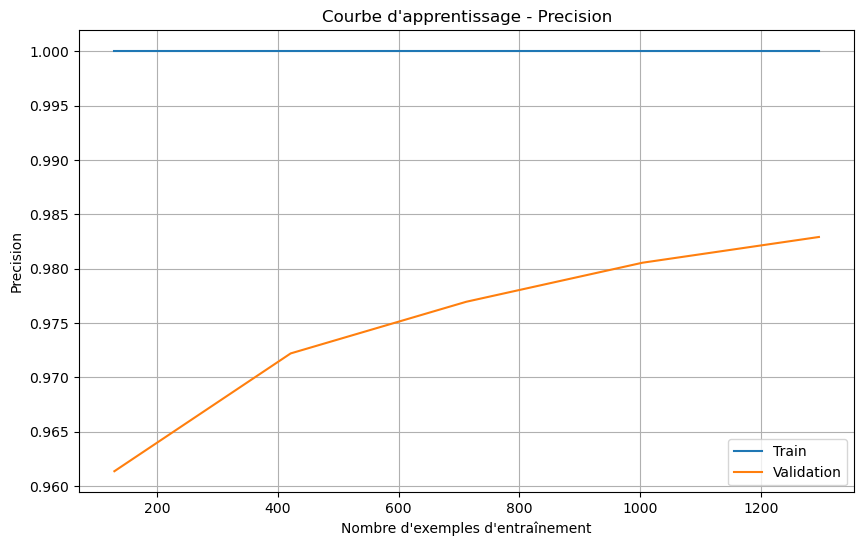

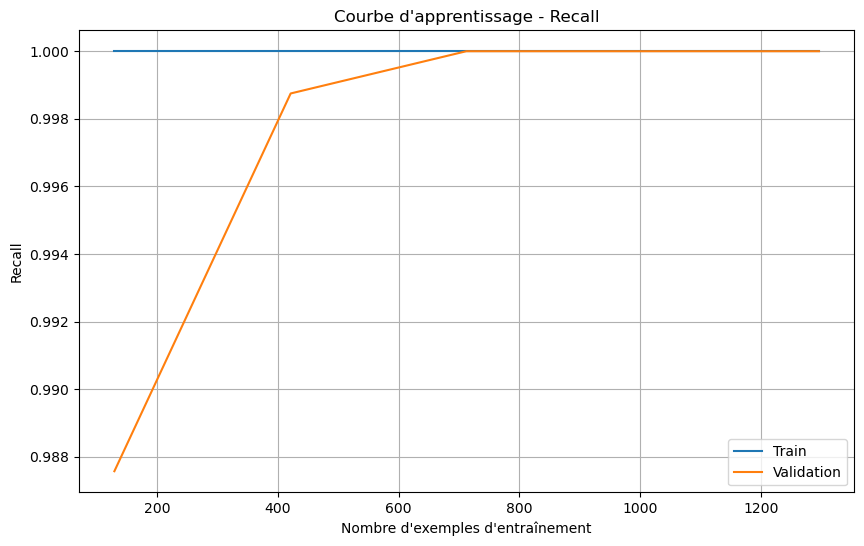

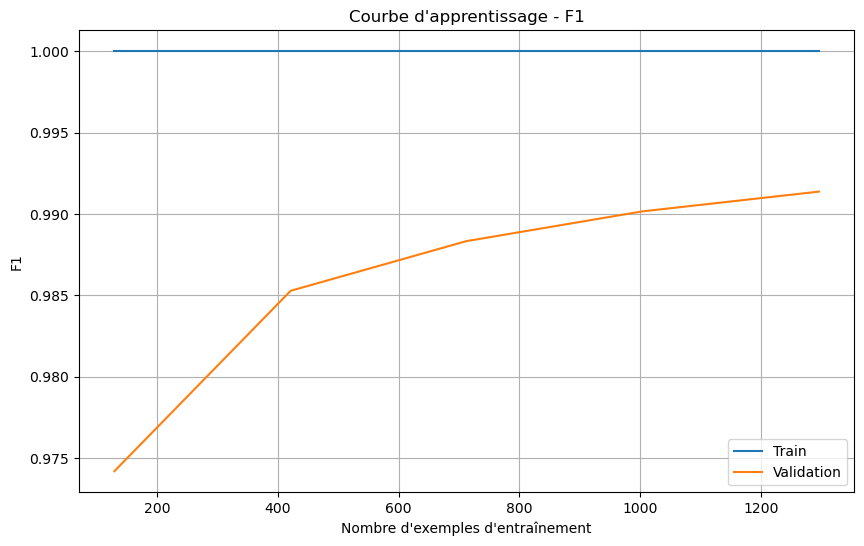

In [51]:
from sklearn.model_selection import learning_curve

# Liste des métriques à évaluer
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Initialiser un dictionnaire pour stocker les résultats des courbes d'apprentissage
learning_curve_results = {}

# Calculer les courbes d'apprentissage pour chaque métrique
for metric in scoring_metrics:
    train_sizes, train_scores, val_scores = learning_curve(
        svm_model, X_train_tfidf, y_train, cv=5,
        scoring=metric, n_jobs=-1)
    
    # Stocker les résultats dans le dictionnaire
    learning_curve_results[metric] = {
        'train_sizes': train_sizes,
        'train_scores': train_scores,
        'val_scores': val_scores
    }

import matplotlib.pyplot as plt

# Liste des métriques à évaluer
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Tracer les courbes d'apprentissage pour chaque métrique
for metric in scoring_metrics:
    train_sizes = learning_curve_results[metric]['train_sizes']
    train_scores_mean = np.mean(learning_curve_results[metric]['train_scores'], axis=1)
    val_scores_mean = np.mean(learning_curve_results[metric]['val_scores'], axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train')
    plt.plot(train_sizes, val_scores_mean, label='Validation')
    plt.xlabel('Nombre d\'exemples d\'entraînement')
    plt.ylabel(metric.capitalize())  # Nom de la métrique
    plt.legend()
    plt.title(f'Courbe d\'apprentissage - {metric.capitalize()}')
    plt.grid(True)

plt.show()


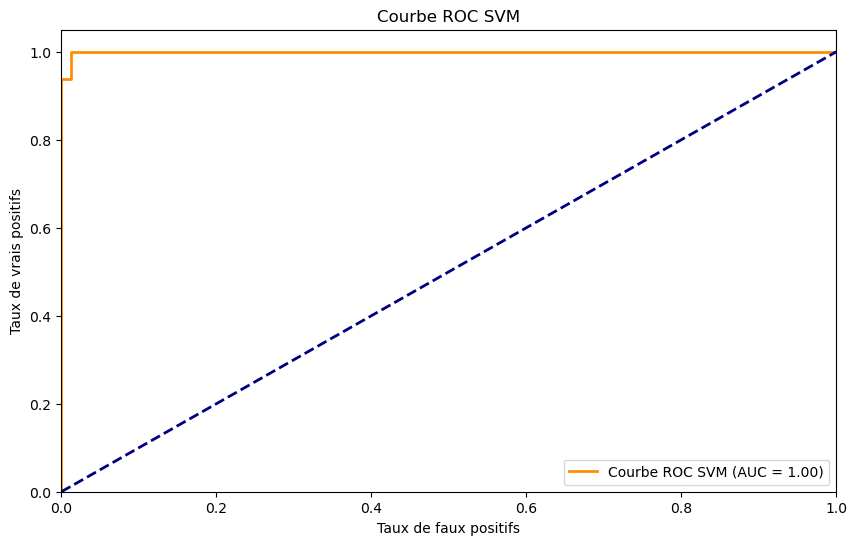

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculer la courbe ROC pour SVM
y_val_prob_svm = svm_model.decision_function(X_val_tfidf)  # Probabilités des classes
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_val_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='Courbe ROC SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC SVM')
plt.legend(loc='lower right')

plt.show()


#  VII.2) Affichage des Prédiction des catégories pour SVM 

In [57]:
# Prédire les étiquettes sur l'ensemble de validation avec le modèle SVM
y_val_pred_svm = svm_model.predict(X_val_tfidf)

# Créer un dictionnaire pour mapper les classes binaires aux classes d'émotion
class_labels = {0: 'Positive Emotion', 1: 'Negative Emotion'}

# Afficher les vraies étiquettes et les prédictions pour chaque exemple
for true_label, predicted_label in zip(y_val, y_val_pred_svm):
    true_emotion = class_labels[true_label]
    predicted_emotion = class_labels[predicted_label]
    print(f"True Label: {true_emotion}, Predicted Label: {predicted_emotion}")


True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Positive Emotion, Predicted 

#  VII.3)Tree Decision

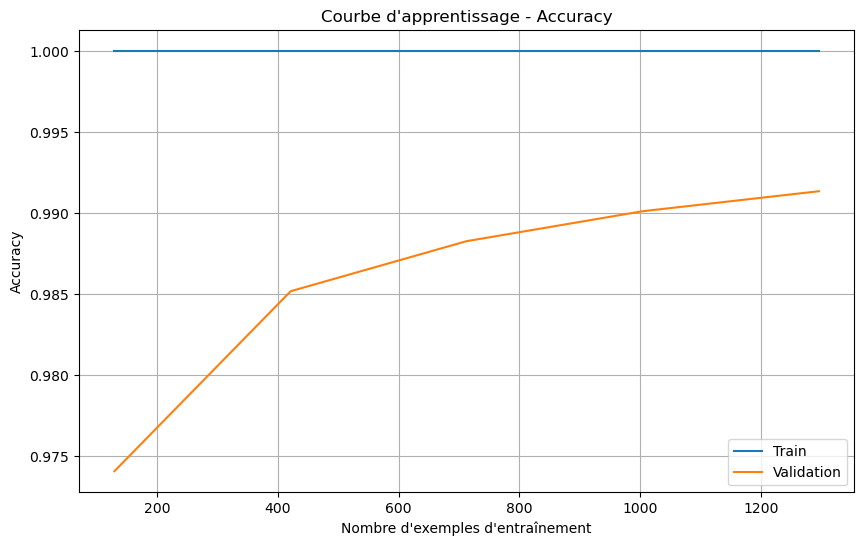

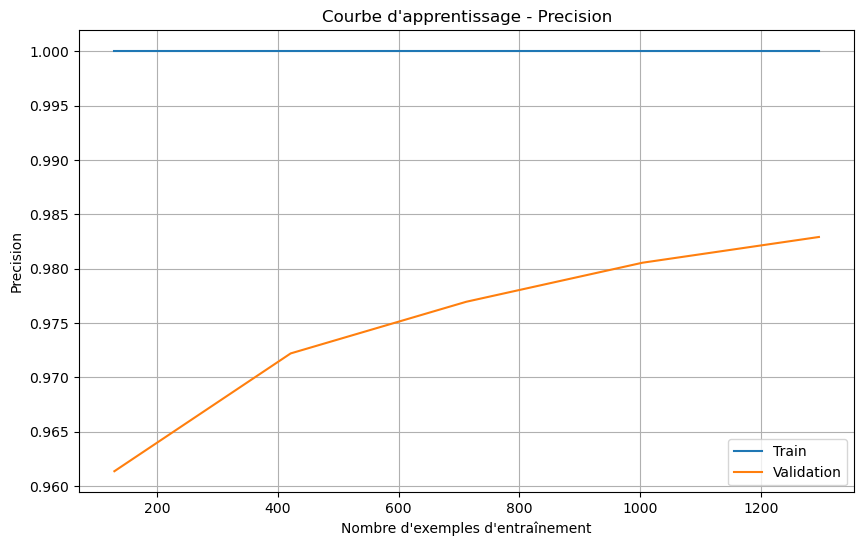

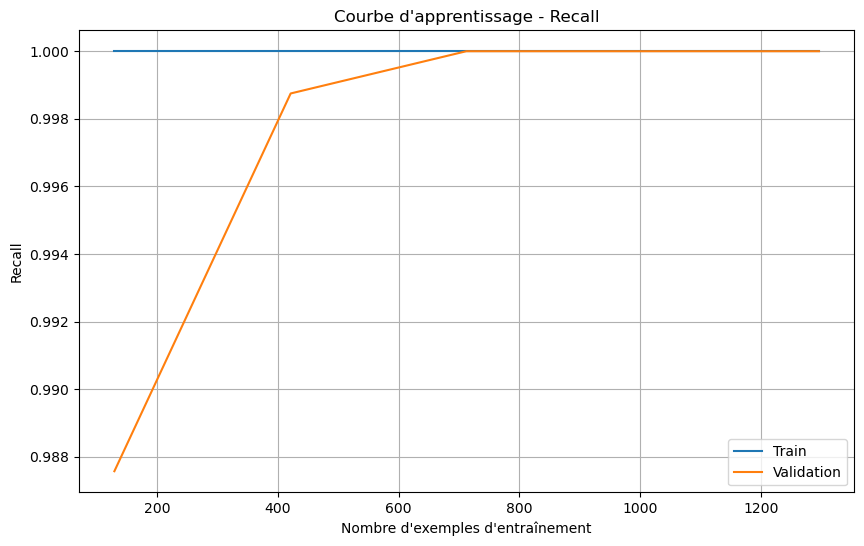

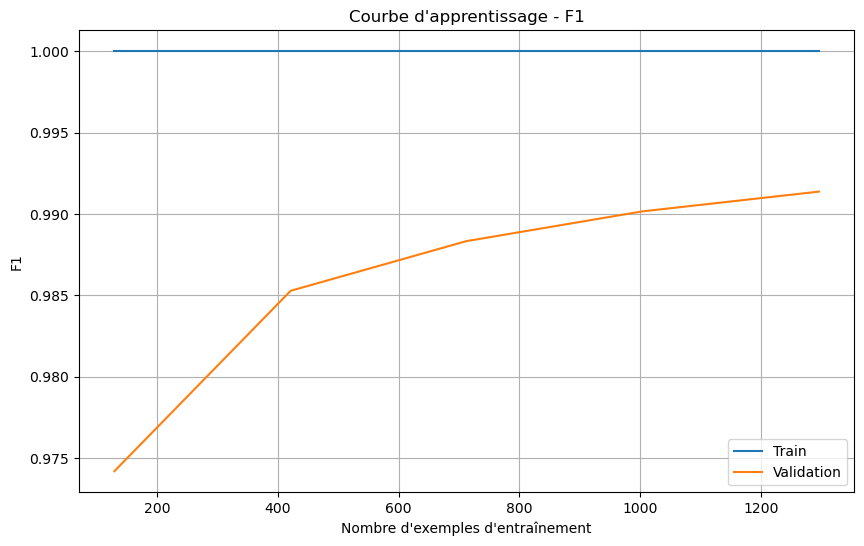

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Tracer les courbes d'apprentissage pour chaque métrique
for metric in scoring_metrics:
    train_sizes = learning_curve_results[metric]['train_sizes']
    train_scores_mean = np.mean(learning_curve_results[metric]['train_scores'], axis=1)
    val_scores_mean = np.mean(learning_curve_results[metric]['val_scores'], axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train')
    plt.plot(train_sizes, val_scores_mean, label='Validation')
    plt.xlabel('Nombre d\'exemples d\'entraînement')
    plt.ylabel(metric.capitalize())  # Nom de la métrique
    plt.legend()
    plt.title(f'Courbe d\'apprentissage - {metric.capitalize()}')
    plt.grid(True)


plt.show()


In [59]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import string
import nltk

# Assurez-vous d'avoir téléchargé les ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Chemins vers vos fichiers de données
train_data_path = 'D:/Users/DELL/Desktop/TravailNLP/cleaned_train.txt'
val_data_path = 'D:/Users/DELL/Desktop/TravailNLP/cleaned_val.txt'
test_data_path = 'D:/Users/DELL/Desktop/TravailNLP/cleaned_test.txt'

# Fonction pour nettoyer le texte
def clean_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Conversion en minuscules
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Suppression de la ponctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Suppression des espaces inutiles
    tokens = [word.strip() for word in tokens if word.strip()]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Suppression des mots vides
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Charger les données
with open(train_data_path, 'r', encoding='utf-8') as file:
    train_data = file.readlines()

with open(val_data_path, 'r', encoding='utf-8') as file:
    val_data = file.readlines()

with open(test_data_path, 'r', encoding='utf-8') as file:
    test_data = file.readlines()
    

# Définir les étiquettes (classe 0 pour émotions positives et classe 1 pour émotions négatives)
train_labels = [0 if any(emotion in line for emotion in ["joy", "love", "surprise"]) else 1 for line in train_data]
val_labels = [0 if any(emotion in line for emotion in ["joy", "love", "surprise"]) else 1 for line in val_data]
test_labels = [0 if any(emotion in line for emotion in ["joy", "love", "surprise"]) else 1 for line in test_data]

# Diviser les données en ensembles d'entraînement, de validation et de test
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Créer un vecteur TF-IDF pour représenter vos données textuelles
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Initialiser et entraîner le modèle de classification par arbre de décision
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_tfidf, y_train)

# Prédire les étiquettes sur l'ensemble de validation
y_val_pred = decision_tree_model.predict(X_val_tfidf)

# Calculer les métriques d'évaluation
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)

# Afficher les métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", roc_auc)


Accuracy: 0.9833333333333333
Precision: 0.9896907216494846
Recall: 0.9795918367346939
F1 Score: 0.9846153846153847
AUC Score: 0.9836983573917372


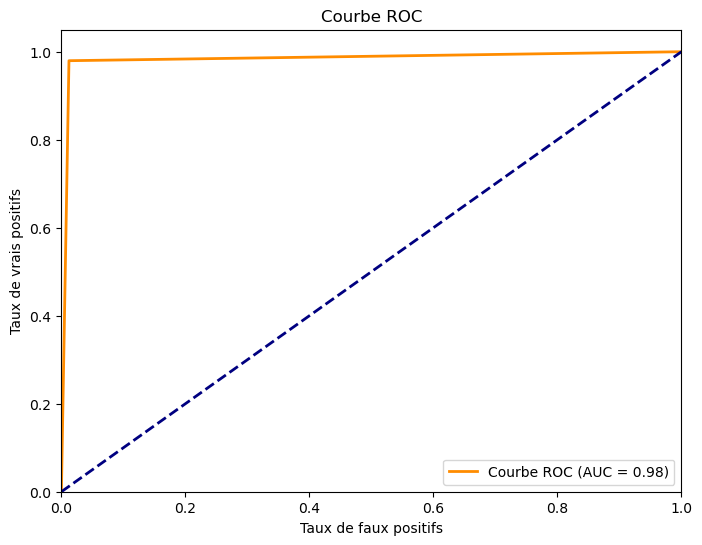

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prédire les probabilités des classes positives (classe 0) pour l'ensemble de validation
y_val_prob_decision_tree = decision_tree_model.predict_proba(X_val_tfidf)[:, 1]

# Calculer la courbe ROC
fpr, tpr, _ = roc_curve(y_val, y_val_prob_decision_tree)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


#  VII.4)Affichage des Prédiction des catégories pour tree decisioon

In [56]:
# Prédire les étiquettes sur l'ensemble de validation
y_val_pred = decision_tree_model.predict(X_val_tfidf)

# Créer un dictionnaire pour mapper les classes binaires aux classes d'émotion
class_labels = {0: 'Positive Emotion', 1: 'Negative Emotion'}

# Afficher les vraies étiquettes et les prédictions pour chaque exemple
for true_label, predicted_label in zip(y_val, y_val_pred):
    true_emotion = class_labels[true_label]
    predicted_emotion = class_labels[predicted_label]
    print(f"True Label: {true_emotion}, Predicted Label: {predicted_emotion}")


True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Negative Emotion, Predicted Label: Positive Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Negative Emotion, Predicted Label: Negative Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Positive Emotion, Predicted Label: Positive Emotion
True Label: Positive Emotion, Predicted 

# VIII) Comparaison entre les modeles

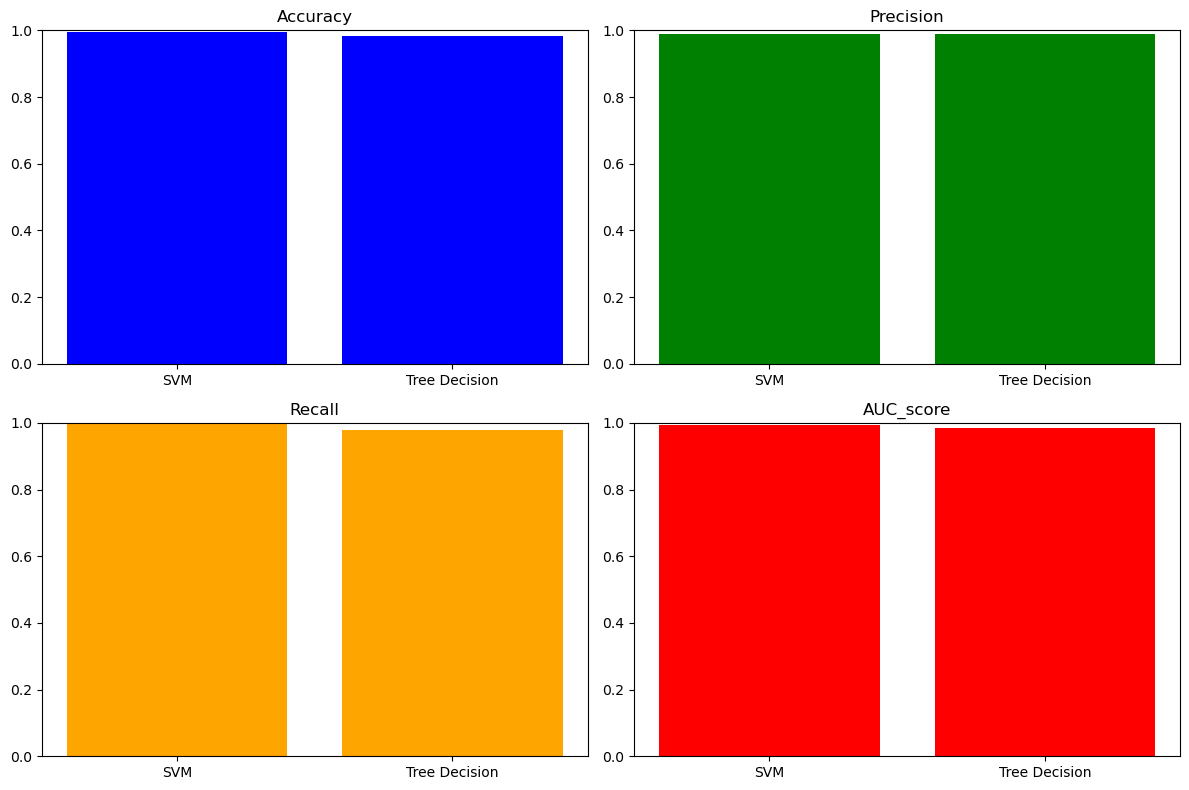

In [25]:
# Définir les métriques pour chaque algorithme
accuracy_svm = 0.9944444444444445  # Remplacez par la valeur de l'accuracy pour CNN
precision_svm =  0.98989898989899 # Remplacez par la valeur de la precision pour CNN
recall_svm = 1.0   # Remplacez par la valeur du recall pour CNN
f1_svm = 0.9949238578680203  # Remplacez par la valeur du F1-score pour CNN
AUC_ROC_svm = 0.9992533598805375


accuracy_treedecision = 0.9833333333333333  # Remplacez par la valeur de l'accuracy pour Transfer Learning
precision_treedecision = 0.9896907216494846  # Remplacez par la valeur de la precision pour Transfer Learning
recall_treedecision = 0.9795918367346939  # Remplacez par la valeur du recall pour Transfer Learning
f1_treedecision = 0.9846153846153847   # Remplacez par la valeur du F1-score pour Transfer Learning
AUC_ROC_treedecesion =  0.9836983573917372 
    

# Créer le graphe à barres avec les métriques définies ci-dessus
import matplotlib.pyplot as plt
import numpy as np

# Métriques pour les trois algorithmes
algorithms = ['SVM', 'Tree Decision']
accuracy_scores = [accuracy_svm, accuracy_treedecision]
precision_scores = [precision_svm, precision_treedecision]
recall_scores = [recall_svm, recall_treedecision]
f1_scores = [f1_svm,f1_treedecision ]
Auc_scores = [AUC_ROC_svm,AUC_ROC_treedecesion]



# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Métrique : Accuracy
axes[0, 0].bar(algorithms, accuracy_scores, color='blue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

# Métrique : Precision
axes[0, 1].bar(algorithms, precision_scores, color='green')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)

# Métrique : Recall
axes[1, 0].bar(algorithms, recall_scores, color='orange')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)

# Métrique : F1-Score
axes[1, 1].bar(algorithms, f1_scores, color='red')
axes[1, 1].set_title('F1-Score')
axes[1, 1].set_ylim(0, 1)



# Métrique : F1-Score
axes[1, 1].bar(algorithms, f1_scores, color='red')
axes[1, 1].set_title('AUC_score')
axes[1, 1].set_ylim(0, 1)


# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphe
plt.show()


# IX) Interprétation des résultats

### Les résultats montrent que les deux modèles, SVM et Decision Tree, ont de très bonnes performances en termes de classification binaire des émotions positives (classe 0) et négatives (classe 1).


### Le modèle SVM présente une excellente exactitude (Accuracy) de 99,44 %, tandis que le modèle Decision Tree obtient également une très bonne exactitude de 98,33 %. Les deux modèles affichent des valeurs élevées de Précision, Recall et F1-Score, indiquant leur capacité à bien détecter les émotions positives et négatives. De plus, les scores AUC-ROC sont proches de 1, ce qui confirme la capacité des modèles à séparer efficacement les deux classes. 

### En résumé, ces résultats indiquent que les modèles SVM et Decision Tree sont très performants pour la classification des émotions positives et négatives dans les données textuelles.